# Flex Field Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from knnBestFit import KnnBestFit
from knnBestNeighbour import KnnBestNeighbor

### First look at Dataset

In [2]:
cleaned_flexfield_fitness_data = pd.read_csv('data/cleaned_flexfield_fitness.csv')
cleaned_flexfield_fitness_data.head()


,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,771155,Female,24,6.2,Endurance training,4,2173.0
1,231932,Male,22,7.4,Fat loss,2,1752.0
2,465838,Female,23,6.0,Build muscle,0,2884.0
3,359178,Female,18,9.3,Build muscle,5,2559.0
4,744167,Male,23,5.7,Flexibility,1,1606.0


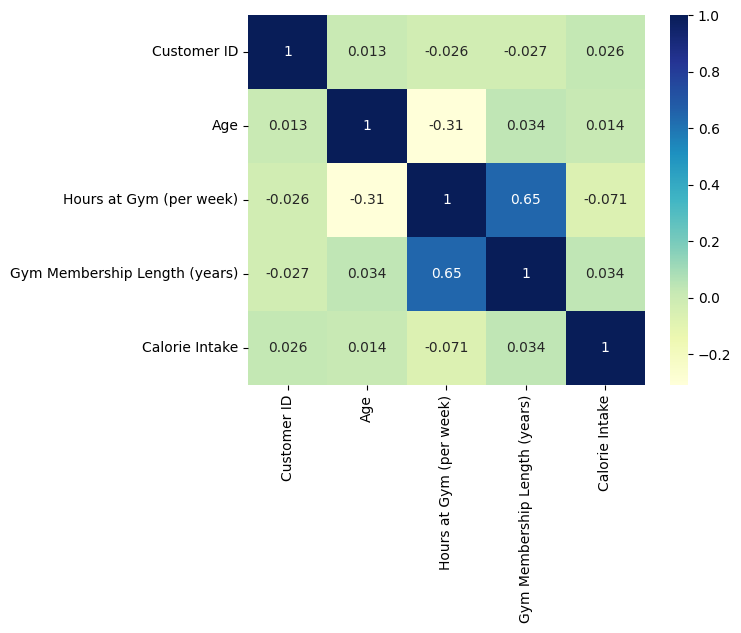

In [5]:
dataplot = sb.heatmap(cleaned_flexfield_fitness_data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

## Visuliaztions

### Fitness Goal vs. Hours at Gym (per week)

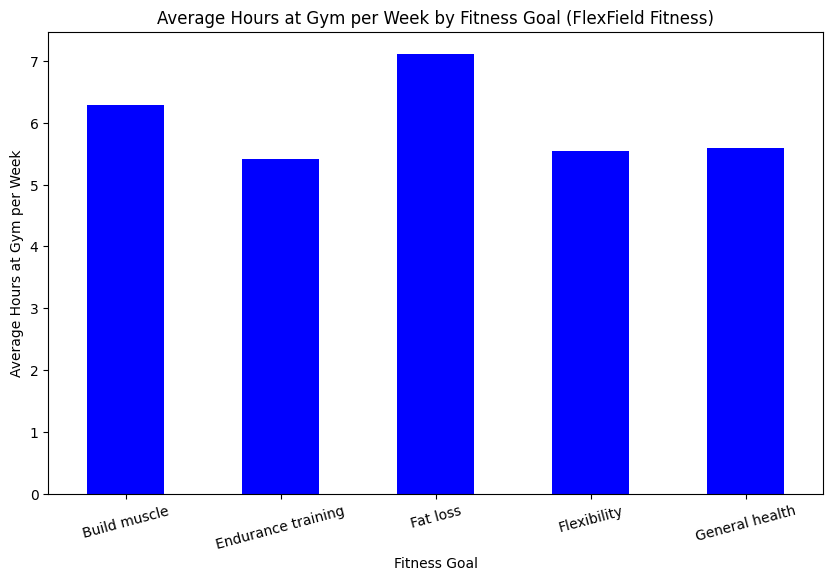

In [3]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_gym = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Hours at Gym (per week)'].mean()
flexfield_fitness_vs_gym.plot(kind='bar', color='blue')
plt.title('Average Hours at Gym per Week by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Hours at Gym per Week')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Fitness Goal vs. Gym Membership Length (years)

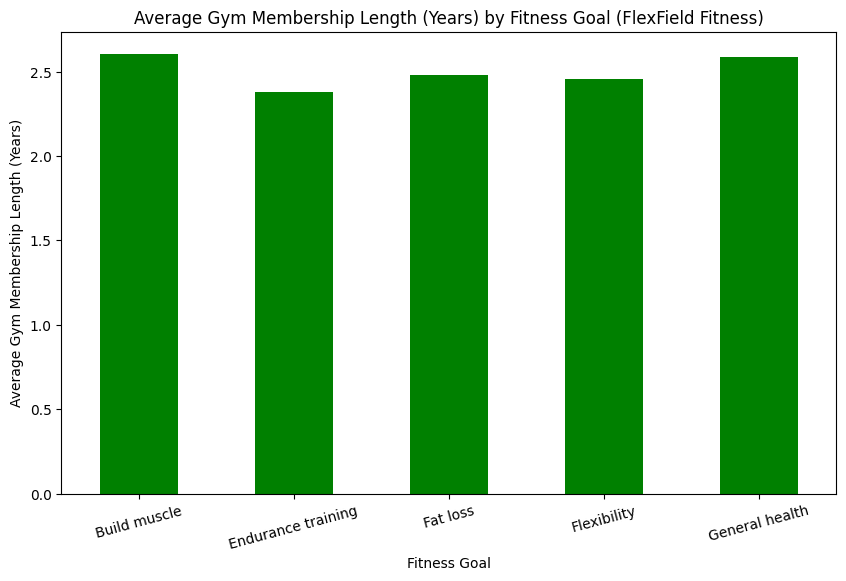

In [4]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_membership = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Gym Membership Length (years)'].mean()
flexfield_fitness_vs_membership.plot(kind='bar', color='green')
plt.title('Average Gym Membership Length (Years) by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Gym Membership Length (Years)')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Fitness Goal vs. Calorie Intake

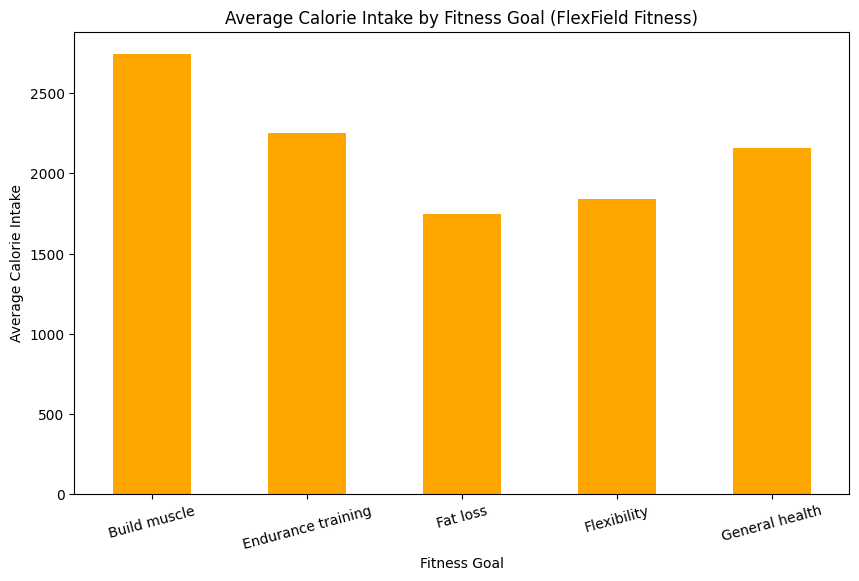

In [5]:
plt.figure(figsize=(10, 6))
flexfield_fitness_vs_calorie = cleaned_flexfield_fitness_data.groupby('Fitness Goal')['Calorie Intake'].mean()
flexfield_fitness_vs_calorie.plot(kind='bar', color='orange')
plt.title('Average Calorie Intake by Fitness Goal (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Fitness Goal')
plt.xticks(rotation=15)
plt.show()

### Hours at Gym (per week) vs. Gym Membership Length (years)

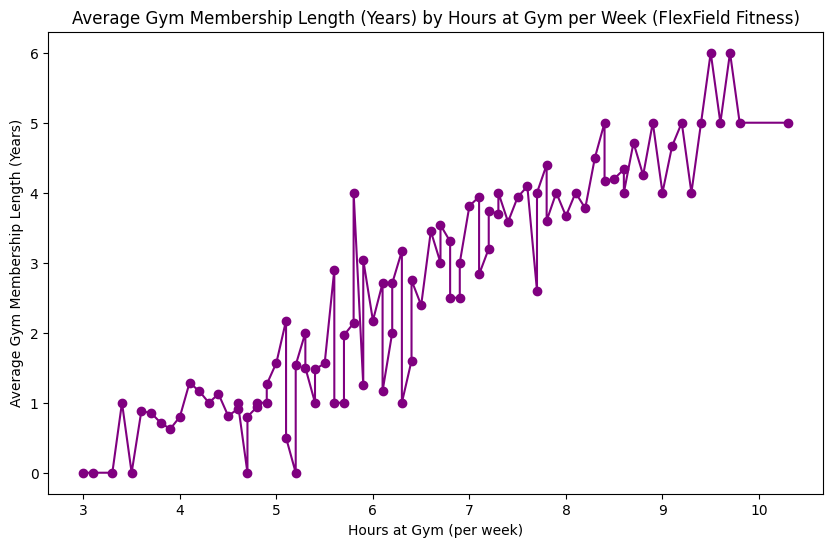

In [6]:
plt.figure(figsize=(10, 6))
flexfield_gym_vs_membership = cleaned_flexfield_fitness_data.groupby('Hours at Gym (per week)')['Gym Membership Length (years)'].mean()
flexfield_gym_vs_membership.plot(kind='line', marker='o', color='purple')
plt.title('Average Gym Membership Length (Years) by Hours at Gym per Week (FlexField Fitness)')
plt.ylabel('Average Gym Membership Length (Years)')
plt.xlabel('Hours at Gym (per week)')
plt.show()

### Hours at Gym (per week) vs. Calorie Intake

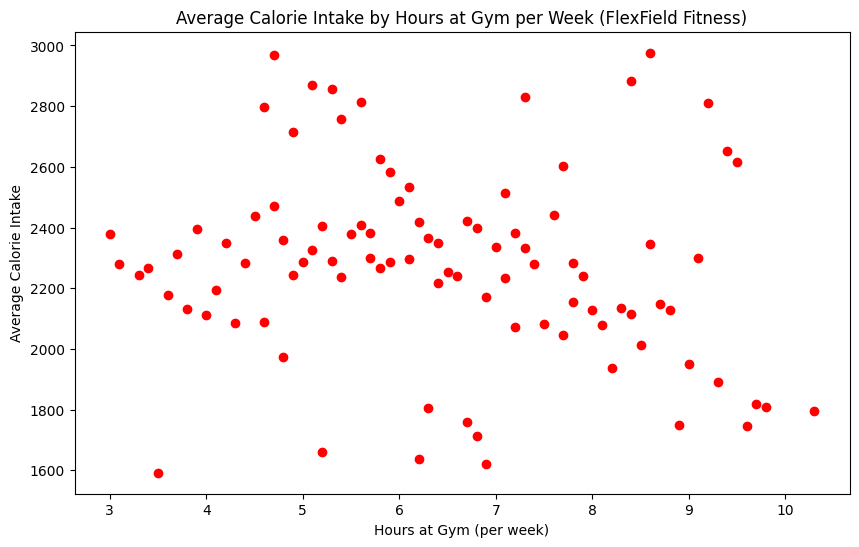

In [70]:
plt.figure(figsize=(10, 6))
flexfield_gym_vs_calorie = cleaned_flexfield_fitness_data.groupby('Hours at Gym (per week)')['Calorie Intake'].mean()
plt.scatter(flexfield_gym_vs_calorie.index, flexfield_gym_vs_calorie.values, color='red', marker='o')
plt.title('Average Calorie Intake by Hours at Gym per Week (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Hours at Gym (per week)')
plt.show()


### Gym Membership Length (years) vs. Calorie Intake

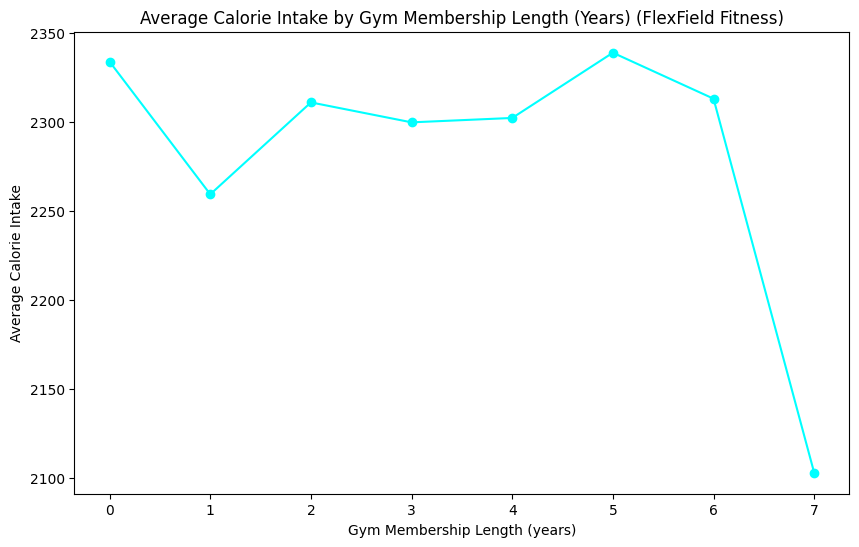

In [8]:
plt.figure(figsize=(10, 6))
flexfield_membership_vs_calorie = cleaned_flexfield_fitness_data.groupby('Gym Membership Length (years)')['Calorie Intake'].mean()
flexfield_membership_vs_calorie.plot(kind='line', marker='o', color='cyan')
plt.title('Average Calorie Intake by Gym Membership Length (Years) (FlexField Fitness)')
plt.ylabel('Average Calorie Intake')
plt.xlabel('Gym Membership Length (years)')
plt.show()

In [22]:
data = []

chefGym = pd.read_csv('data/flexfield_chefsmeal.csv')
diet_map = {'Whole foods': 1, 'High protein': 2, 'Vegan': 3, 'Low carb': 4}
chefGym['Dietary Preferences'] = chefGym['Dietary Preferences'].map(diet_map)


coreboostGym = pd.read_csv('data/flexfield_coreboost.csv')
drink_map = {'Electrolyte': 1, 'Protein shakes': 2, 'Fresh juice': 3, 'Energy drinks': 4}
coreboostGym['Preferred Sports Drink Type'] = coreboostGym['Preferred Sports Drink Type'].map(drink_map)

pulsegearGym = pd.read_csv('data/flexfield_pulsegear.csv')
primary_apparel_map = {'Physical Retailer': 1, 'E-commerce Retailer': 2, 'Brand Website': 3}
pulsegearGym['Primary Apparel Purchase Channel'] = pulsegearGym['Primary Apparel Purchase Channel'].map(primary_apparel_map)

apparel_map = {'Performance': 1, 'Accessories': 2, 'Footwear': 3, 'Outerwear': 4, 'Leisure': 5, 'Yoga': 6}
pulsegearGym['Type of Apparel Purchased'] = pulsegearGym['Type of Apparel Purchased'].map(apparel_map)

In [23]:
data.append(chefGym)
data.append(coreboostGym)
data.append(pulsegearGym)

In [15]:
data

[      Customer ID  Gender   Age  Hours at Gym (per week)        Fitness Goal  \
 0        221958.0  Female  27.0                      7.3        Build muscle   
 1        771155.0  Female  24.0                      6.2  Endurance training   
 2        231932.0    Male  22.0                      7.4            Fat loss   
 3        465838.0  Female  23.0                      6.0        Build muscle   
 4        359178.0  Female  18.0                      9.3        Build muscle   
 ...           ...     ...   ...                      ...                 ...   
 997      170390.0    Male  29.0                      3.7  Endurance training   
 998      807689.0  Female  32.0                      5.5        Build muscle   
 999      353490.0    Male  28.0                      7.4        Build muscle   
 1000          NaN     NaN   NaN                      NaN                 NaN   
 1001          NaN     NaN   NaN                      NaN                 NaN   
 
       Gym Membership Leng

In [24]:
for df in data:
    gender_map = {'Male': 1, 'Female': 0, 'Other': 2}
    df['Gender'] = df['Gender'].map(gender_map)

    fitness_goal_map = {'Build muscle': 1, 'General health': 2, 'Fat loss': 3, 'Endurance training': 4}
    df['Fitness Goal'] = df['Fitness Goal'].map(fitness_goal_map)


In [25]:
for df in data:
    df = df.drop('Customer ID', axis=1)
    df = df.dropna()


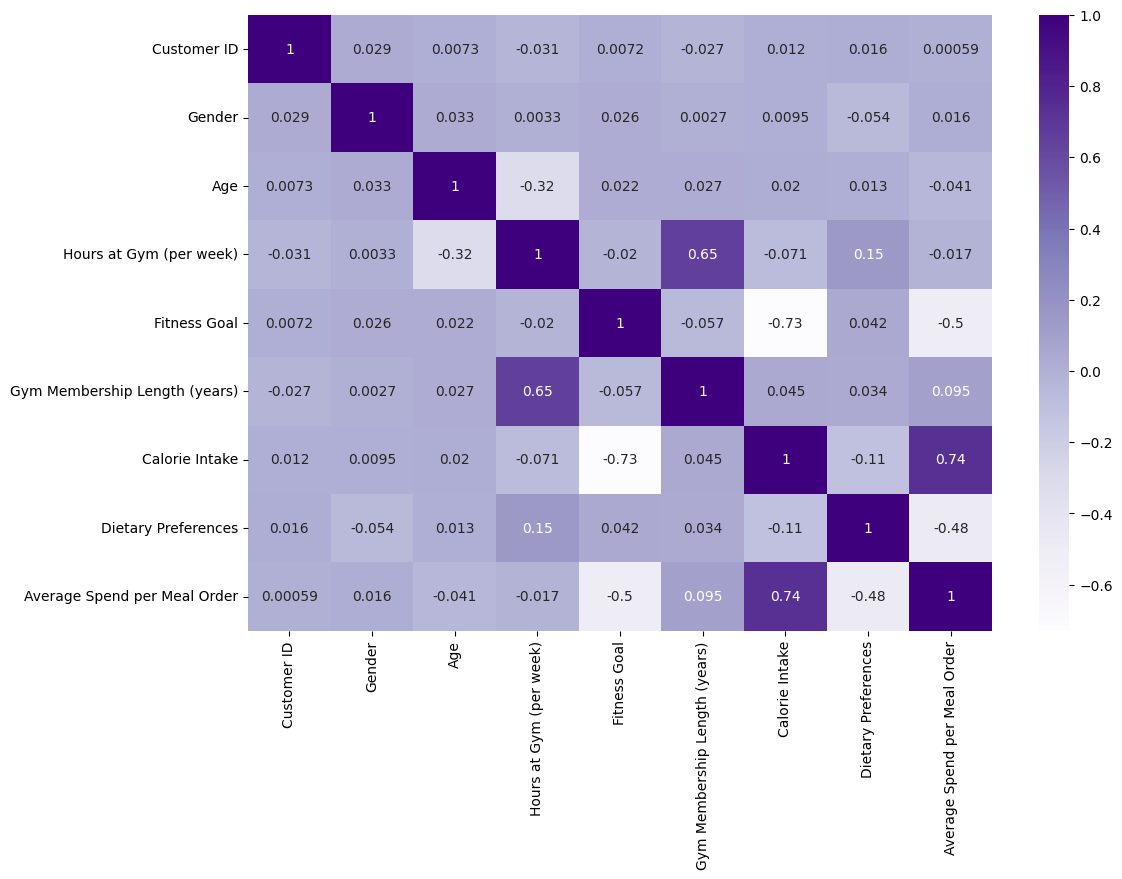

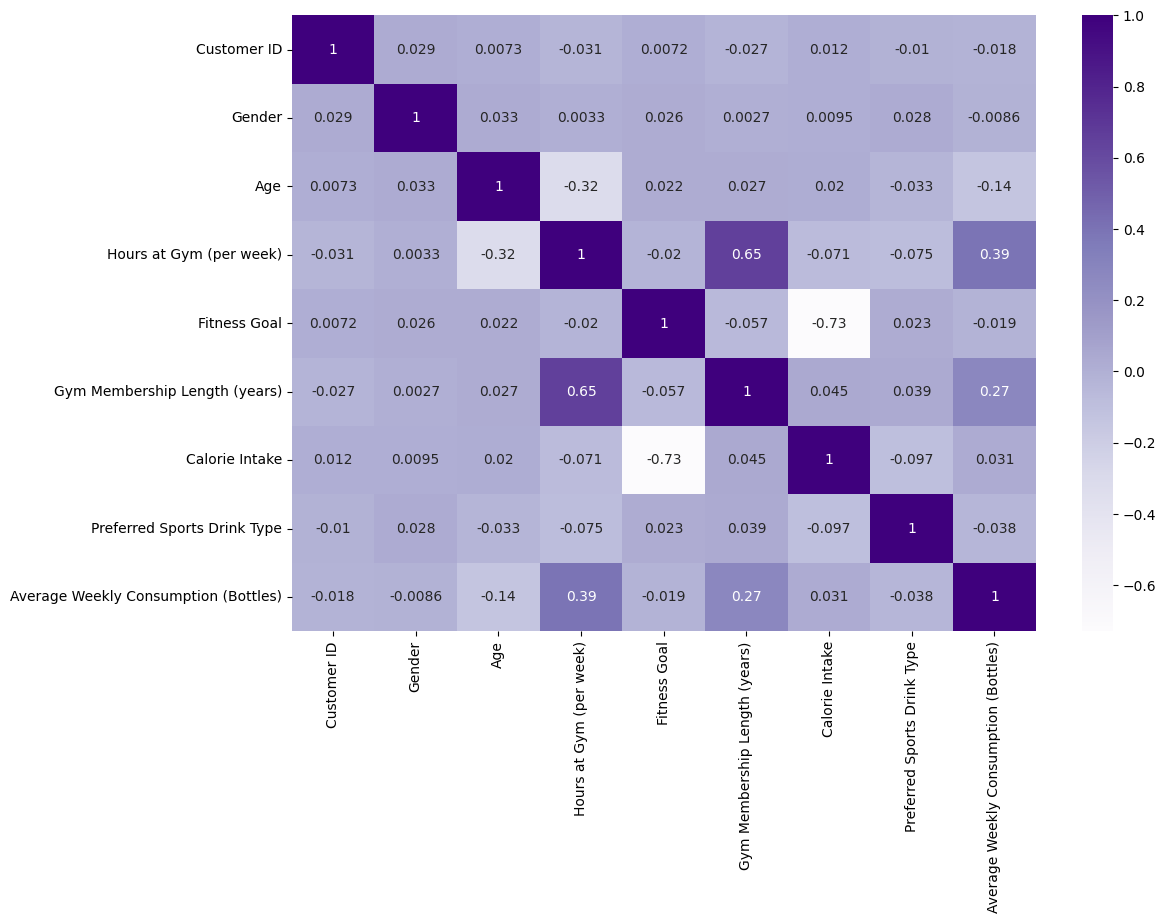

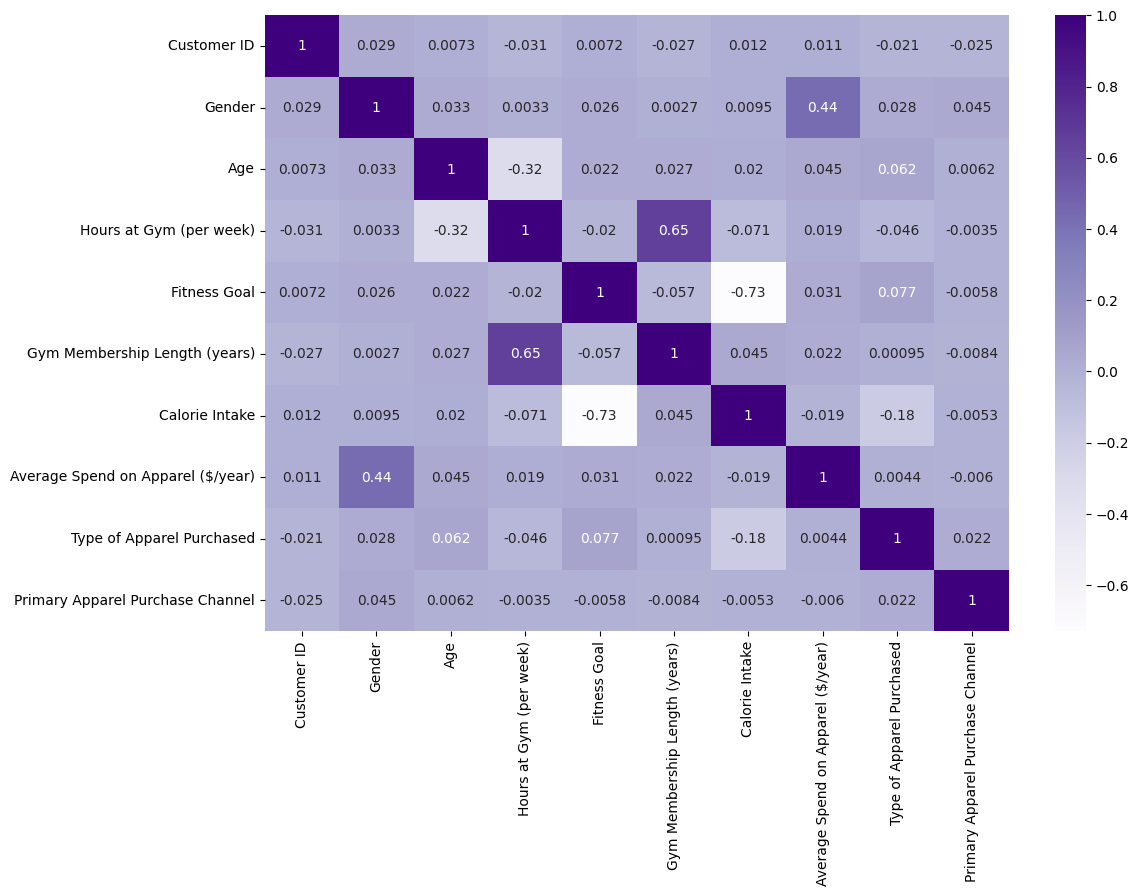

In [26]:
for df in data:
    plt.figure(figsize=(12, 8))
    dataplot = sb.heatmap(df.corr(numeric_only=True), cmap="Purples", annot=True)
    plt.show()

In [34]:
coreboostGym = coreboostGym.drop('Customer ID', axis=1)
coreboostGym = coreboostGym.dropna()

KeyError: "['Customer ID'] not found in axis"

In [46]:
coreboostGym.head()

,Preferred Sports Drink Type,Average Weekly Consumption (Bottles),Gym Membership Length (years)
1,1.0,11,4
2,1.0,12,2
3,2.0,10,0
4,2.0,14,5
6,2.0,10,2


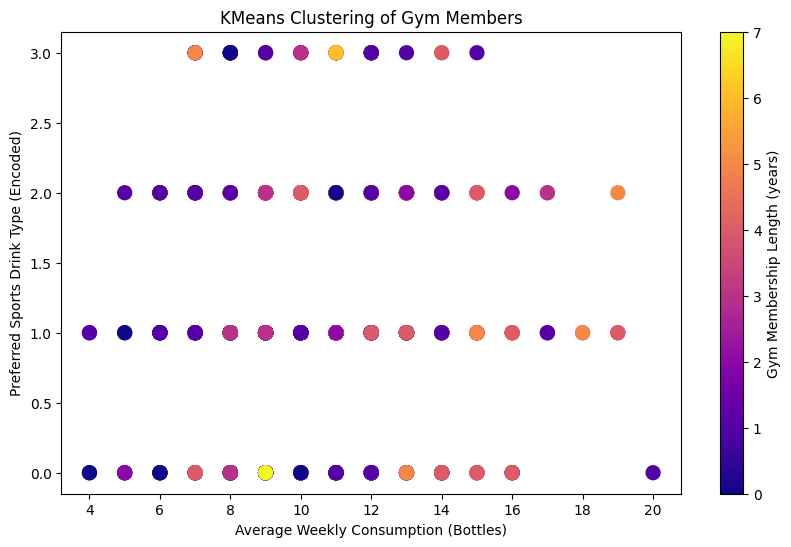

Adjusted Rand Index (ARI): 0.0459239457579282
Normalized Mutual Information (NMI): 0.030762820535714663
Silhouette Score: 0.4379168150464221


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming coreboostGym is your DataFrame
# Step 1: Preprocess the data
# Convert 'Preferred Sports Drink Type' to numerical using LabelEncoder
le = LabelEncoder()
coreboostGym['Preferred Sports Drink Type Encoded'] = le.fit_transform(coreboostGym['Preferred Sports Drink Type'])

# Define X as the features we want to cluster on
X = coreboostGym[['Preferred Sports Drink Type Encoded', 'Average Weekly Consumption (Bottles)']]

# Step 2: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters (e.g., 3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Step 3: Add the cluster labels and Gym Membership Length to the original DataFrame
coreboostGym['Cluster'] = cluster_labels

# Step 4: Visualize the clusters with color indicating 'Gym Membership Length (years)'
plt.figure(figsize=(10, 6))

# Here we color the points based on Gym Membership Length (years)
scatter = plt.scatter(coreboostGym['Average Weekly Consumption (Bottles)'], 
                      coreboostGym['Preferred Sports Drink Type Encoded'],
                      c=coreboostGym['Gym Membership Length (years)'], 
                      cmap='plasma', s=100)

# Adding a color bar that reflects the 'Gym Membership Length (years)'
colorbar = plt.colorbar(scatter)
colorbar.set_label('Gym Membership Length (years)')

plt.title('KMeans Clustering of Gym Members')
plt.xlabel('Average Weekly Consumption (Bottles)')
plt.ylabel('Preferred Sports Drink Type (Encoded)')
plt.show()

# Step 5: Clustering Evaluation Metrics

# Silhouette Score: Evaluate how well-separated the clusters are
silhouette_avg = silhouette_score(X, cluster_labels)

# If ground truth labels for "Preferred Sports Drink Type" exist, we can calculate ARI and NMI
# For ARI and NMI, you need some

print("Adjusted Rand Index (ARI):", ari_score)
print("Normalized Mutual Information (NMI):", nmi_score)
print("Silhouette Score:", silhouette_avg)


KeyError: 'Age'